# Pre Procesamiento de tweets

ya que tenemos los tweets descargados de cada uno de los candidatos, vamos a realizar un preprocesamiento de los datos a fin de limpiarlos, normalizarlos y estandarizarlos.

- las fechas quedarán en formato yyyy-mm-dd
- todo estará en minusculas
- solo se trabajará con palabras


In [11]:
# Importamos librerias requeridas

from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

import matplotlib.pyplot as plt
import pandas as pd
import re 
import spacy

In [12]:
nlp = spacy.load('es_core_news_lg')

es_stop_words = stopwords.words('spanish')

In [13]:
#Se crean funciones auxiliares para el proces

def cleantext(text):
    txt_mod = ""
    text = re.sub(r'(https?://)?(www\.)?([a-zA-Z0-9_%]*)\b\.[a-z]{2,4}(\.[a-z]{2})?((/[a-zA-Z0-9_%]*)+)?(\.[a-z]*)?', '', text)
    text = re.sub(r'@[A-Za-z09]+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?:\/\/?', '', text)
    text = text.replace('\n', '')
    text = text.replace('.', ' ')
    text = text.replace(',', ' ')
    text = re.sub(r't.co+', '', text)
    
    
    for word in text.split(' '):
        if len(txt_mod) == 0:
            txt_mod = word.lower().strip()
        else:
            txt_mod = txt_mod+' '+word.lower().strip()
                
    return txt_mod

In [14]:
#Cargamos los dataframes de los tweets originales descargados

df_tweets_petro = pd.read_csv('./data/tweets_petro.csv', sep='|')
df_tweets_petro = df_tweets_petro[['id',
                                   'texto',
                                   'fecha']]

df_tweets_fajardo = pd.read_csv('./data/tweets_sergio.csv', sep='|')
df_tweets_fajardo = df_tweets_fajardo[['id',
                                       'texto',
                                       'fecha']]

df_tweets_rodolfo = pd.read_csv('./data/tweets_rodolfo.csv', sep='|')
df_tweets_rodolfo = df_tweets_rodolfo[['id',
                                       'texto',
                                       'fecha']]

df_tweets_federico = pd.read_csv('./data/tweets_fico.csv', sep='|')
df_tweets_federico = df_tweets_federico[['id',
                                         'texto',
                                         'fecha']]

In [15]:
df_tweets_petro.columns = ['id', 'tweet', 'fecha_hora']
df_tweets_fajardo.columns = ['id', 'tweet', 'fecha_hora']
df_tweets_rodolfo.columns = ['id', 'tweet', 'fecha_hora']
df_tweets_federico.columns = ['id', 'tweet', 'fecha_hora']

In [19]:
#Se aplican funciones de limpieza al cada dataframe y se guarda el texto procesado.

df_tweets_petro['tweet'] = df_tweets_petro['tweet'].apply(cleantext)
df_tweets_petro.to_csv('./data/tweets_petro_clean.csv')

df_tweets_fajardo['tweet'] = df_tweets_fajardo['tweet'].apply(cleantext)
df_tweets_fajardo.to_csv('./data/tweets_fajardo_clean.csv')

df_tweets_rodolfo['tweet'] = df_tweets_rodolfo['tweet'].apply(cleantext)
df_tweets_rodolfo.to_csv('./data/tweets_rodolfo_clean.csv')

df_tweets_federico['tweet'] = df_tweets_federico['tweet'].apply(cleantext)
df_tweets_federico.to_csv('./data/tweets_fico_clean.csv')

In [32]:
df_tweets_petro['fecha'] = pd.to_datetime(df_tweets_petro['fecha_hora']).dt.date
df_tweets_fajardo['fecha'] = pd.to_datetime(df_tweets_fajardo['fecha_hora']).dt.date
df_tweets_rodolfo['fecha'] = pd.to_datetime(df_tweets_rodolfo['fecha_hora']).dt.date
df_tweets_federico['fecha'] = pd.to_datetime(df_tweets_federico['fecha_hora']).dt.date

In [53]:
df_estadisticas_petro = df_tweets_petro[['fecha', 'id']]
df_estadisticas_fajardo = df_tweets_fajardo[['fecha', 'id']]
df_estadisticas_rodolfo = df_tweets_rodolfo[['fecha', 'id']]
df_estadisticas_federico = df_tweets_federico[['fecha', 'id']]

df_estadisticas_petro = df_estadisticas_petro.groupby('fecha').count()
df_estadisticas_petro['usuario'] = '@petrogustavo'
df_estadisticas_fajardo = df_estadisticas_fajardo.groupby('fecha').count()
df_estadisticas_fajardo['usuario'] = '@sergio_fajardo'
df_estadisticas_rodolfo= df_estadisticas_rodolfo.groupby('fecha').count()
df_estadisticas_rodolfo['usuario'] = '@ingrodolfohdez'
df_estadisticas_federico = df_estadisticas_federico.groupby('fecha').count()
df_estadisticas_federico['usuario'] = '@ficogutierrez'


Text(0, 0.5, 'Total Tweets')

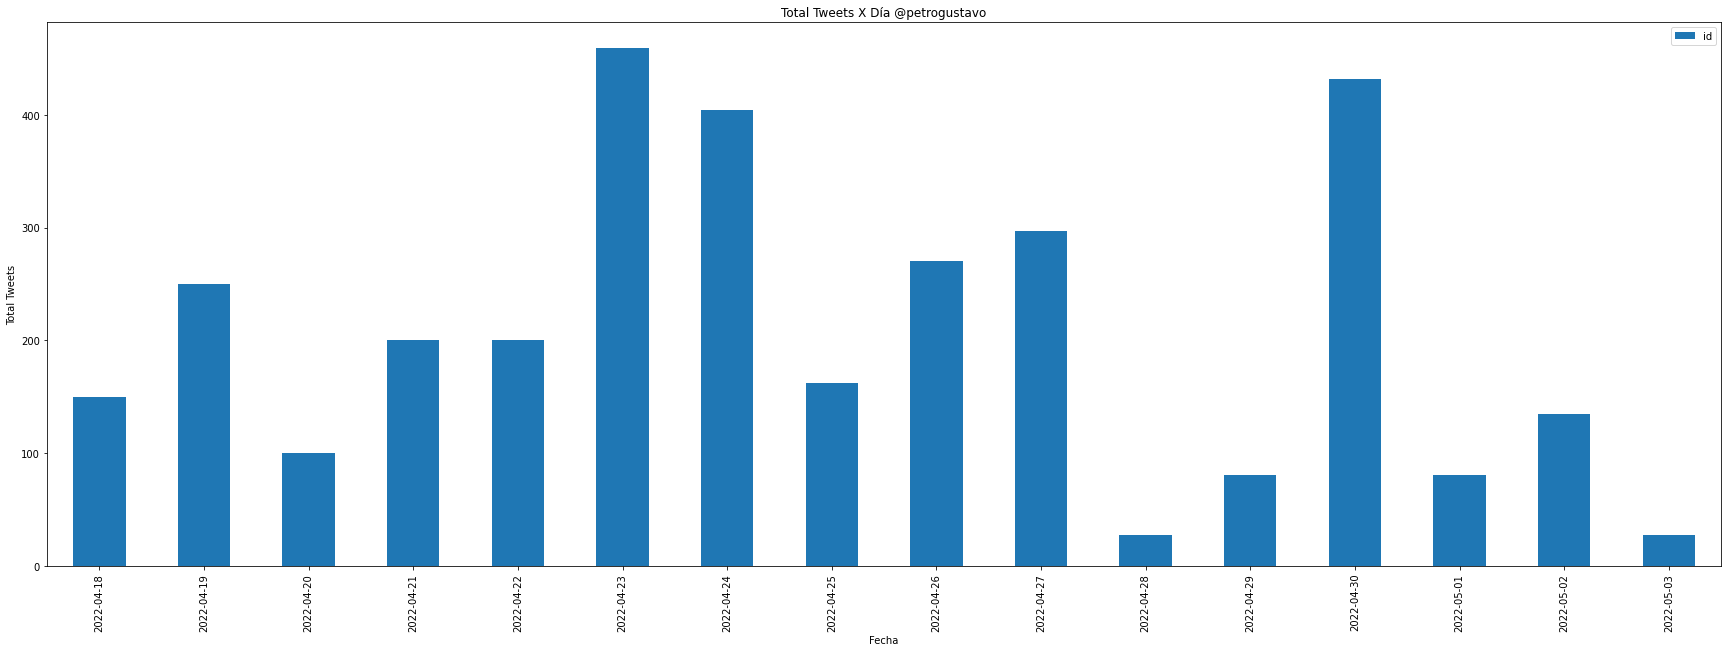

In [85]:
df_estadisticas_petro.plot.bar(figsize = (30,10))

plt.title("Total Tweets X Día @petrogustavo")
plt.xlabel("Fecha")
plt.ylabel("Total Tweets")

In [58]:
df_estadisticas_twitter = pd.concat([df_estadisticas_petro,
                                    df_estadisticas_fajardo,
                                    df_estadisticas_rodolfo,
                                    df_estadisticas_federico])

df_estadisticas_twitter.to_csv('./data/df_estadisticas_tweets_x_usuario.csv')